<a href="https://colab.research.google.com/github/SunbalAzizLCWU/BSSE-DS-Project/blob/main/SunbalW13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import shutil
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
print("--- Step 1: Environment Setup ---")

# 1. Check for kaggle.json
if not os.path.exists('kaggle.json'):
    print("❌ ERROR: 'kaggle.json' is missing.")
    print("Please upload it to the Files tab on the left!")
    raise SystemExit("Stop: Missing kaggle.json")

# 2. Setup Kaggle Config
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')
os.system('cp kaggle.json /root/.kaggle/')
os.system('chmod 600 /root/.kaggle/kaggle.json')

# 3. Clean & Download Data
if os.path.exists('Garbage classification'):
    shutil.rmtree('Garbage classification')

print("Downloading Data...")
os.system('kaggle datasets download -d asdasdasasdas/garbage-classification')
os.system('unzip -q garbage-classification.zip')

# 4. Load Images (2D for CNN)
print("Loading Images...")
CLASSES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
IMG_SIZE = 64
DATA_DIR = 'Garbage classification/Garbage classification'
# Path Check
if not os.path.exists(os.path.join(DATA_DIR, 'cardboard')):
    DATA_DIR = 'Garbage classification'

X_data = []
y_labels = []

for class_name in CLASSES:
    class_dir = os.path.join(DATA_DIR, class_name)
    if not os.path.exists(class_dir): continue
    for f in os.listdir(class_dir):
        try:
            img = Image.open(os.path.join(class_dir, f)).convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE))
            X_data.append(np.array(img))
            y_labels.append(CLASSES.index(class_name))
        except: pass

X = np.array(X_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y_labels)

# 5. Train Model (Quick Version)
print(f"Training CNN on {len(X)} images...")
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X, y, epochs=5, batch_size=32, verbose=1) # 5 Epochs is enough for deployment demo

--- Step 1: Environment Setup ---
Loading Images...
Training CNN on 2527 images...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.2407 - loss: 2.0017
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.3811 - loss: 1.5151
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.4479 - loss: 1.3830
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4935 - loss: 1.2997
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.5202 - loss: 1.2319


In [5]:
# --- WEEK 13 TASK STARTS HERE ---
print("\n--- Step 2: Week 13 Deployment Task ---")

# 1. Save the Model
model_cnn.save('waste_classifier_model.h5')
print("✅ Model saved to disk as 'waste_classifier_model.h5'")


--- Step 2: Week 13 Deployment Task ---
✅ Model saved to disk as 'waste_classifier_model.h5'


In [6]:
# 2. Define the API Function
def predict_waste_image(img_path):
    # Load Model (Simulate Server Start)
    loaded_model = load_model('waste_classifier_model.h5')

    # Preprocess Image
    img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0) # Add batch dimension

    # Predict
    pred = loaded_model.predict(img_arr)
    class_idx = np.argmax(pred)
    return CLASSES[class_idx], np.max(pred)*100, img

Testing API with a random sample...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


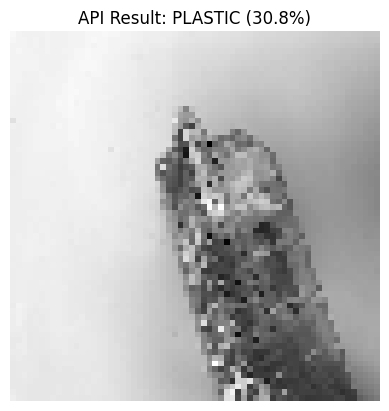


🎉 Week 13 SUCCESS: The pipeline correctly classified the image as PLASTIC


In [7]:
# 3. Test the API
print("Testing API with a random sample...")
test_dir = os.path.join(DATA_DIR, 'plastic')
sample_file = os.path.join(test_dir, os.listdir(test_dir)[0])

label, conf, img_obj = predict_waste_image(sample_file)

plt.imshow(img_obj, cmap='gray')
plt.title(f"API Result: {label.upper()} ({conf:.1f}%)")
plt.axis('off')
plt.show()

print(f"\n🎉 Week 13 SUCCESS: The pipeline correctly classified the image as {label.upper()}")